<a href="https://colab.research.google.com/github/deadshotbane80/Bigram_Trigram/blob/main/Bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline


In [2]:
words = open('names.txt','r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
chars = sorted(list(set(''.join(words))))

In [35]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [40]:
#Creating the dataset for training
X,Y = [],[]
for w in words:
  nword = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(nword,nword[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    X.append(ix1)
    Y.append(ix2)
    # print(ch1,ch2)
X = torch.tensor(X)
Y = torch.tensor(Y)

In [45]:
g = torch.Generator().manual_seed(2147483647)
xenc = F.one_hot(X,num_classes = 27).float()
W = torch.randn((27,27),generator = g,requires_grad = True)
parameters = [W]

In [46]:
#Gradient Descent
li = []
for i in range(100):
  #forward propagation
  logits = (xenc @ W)
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdim = True)
  loss = -probs[torch.arange(len(X)),Y].log().mean() #Softmax
  #Backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # print(loss.item())
  li.append(loss.item())
  #Update
  for p in parameters:
    p.data += -50*p.grad
print(loss.item())

2.4728763103485107


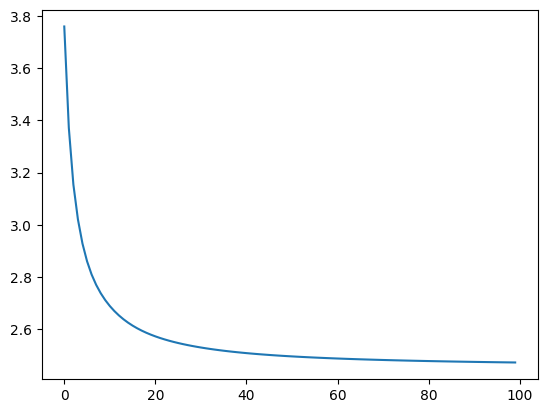

In [28]:
plt.plot(p,li) #for plotting loss with iterations

In [47]:
for i in range(20):
  ix = 0
  name = []
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdim = True)
    ix = torch.multinomial(probs,num_samples = 1,replacement = True,generator = g).item()
    name.append(itos[ix])
    if ix == 0:
      break
  print(''.join(name))

morvann.
akela.
az.
arileri.
chaiadayra.
fbrlqwouseyton.
za.
sabran.
han.
ke.
etamete.
conakin.
lalastan.
tcyonanisemyn.
lewlixin.
kadarekan.
ljagkin.
mfian.
kicnaylula.
jvy.
